In [72]:
## Setup
from notebook_utils import resolve_paths_from_parent_directory
# auto reload notebook deps
%reload_ext autoreload
%autoreload 2
resolve_paths_from_parent_directory()

In [91]:
# imports
from data_loader import load_global_feature_set
from run_experiment import run_experiment
from feature_sets import baseline_important_features
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor


data_dir = "../../data"
route_str = "B46"
station_str = "JFK"
direction_int = 1


## Prepare globlal feature set
df_route, stop_id_ls = load_global_feature_set(data_dir, route_str, station_str, direction_int)


In [116]:
models = [LassoCV(), RandomForestRegressor(), XGBRegressor()]

for model in models:
    print(model)
    print('\n')
    experiment_eval = run_experiment(
            global_feature_set=df_route,
            feature_extractor_fn=baseline_important_features,
            model=model,
            stop_id_ls=stop_id_ls,
            dependent_variable="passenger_count",
            split_heuristic="date",
            test_size=0.1,
            split_date=(9, 27, 2021),
            split_time=(0, 0),
            num_test_periods=0,
            random_state=0
        )
    print('\n')
    print("Train")
    model_pred_eval, mean_pred_eval = experiment_eval.basic_eval("train", pretty_print=True)
    print('\n')
    print('-----------------------------')
    print('\n')
    print("Test")
    model_pred_eval, mean_pred_eval = experiment_eval.basic_eval("test", pretty_print=True)
    print('\n')
    print('=============================')
    print('\n')

LassoCV()


Selecting features...
Fitting model...
Inference...


Train
Performance: Model Prediction
MAE: 7.1
ME : 74.1
R^2: 0.07


Performance: Mean Prediction
MAE: 7.4
ME : 74.3
R^2: 0.00


-----------------------------


Test
Performance: Model Prediction
MAE: 7.2
ME : 33.1
R^2: -0.06


Performance: Mean Prediction
MAE: 6.9
ME : 38.3
R^2: -0.01




RandomForestRegressor()


Selecting features...
Fitting model...
Inference...


Train
Performance: Model Prediction
MAE: 0.8
ME : 25.8
R^2: 0.99


Performance: Mean Prediction
MAE: 7.4
ME : 74.3
R^2: 0.00


-----------------------------


Test
Performance: Model Prediction
MAE: 5.0
ME : 30.1
R^2: 0.40


Performance: Mean Prediction
MAE: 6.9
ME : 38.3
R^2: -0.01




XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning

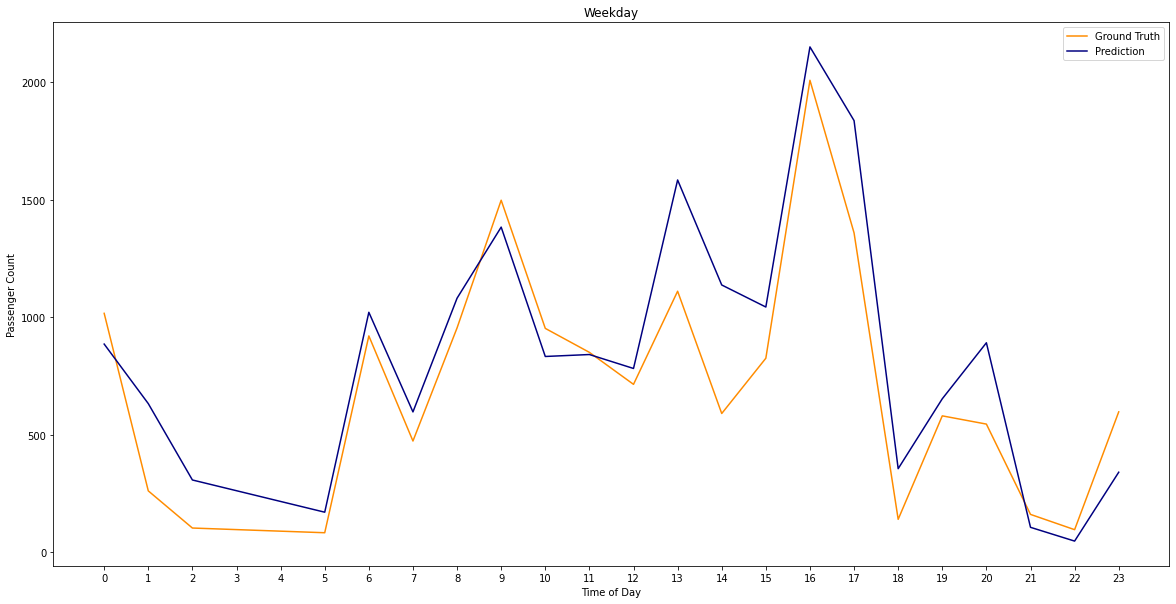

In [117]:
experiment_eval.plot_passenger_count_by_time_of_day('test', segment=None, agg='sum')

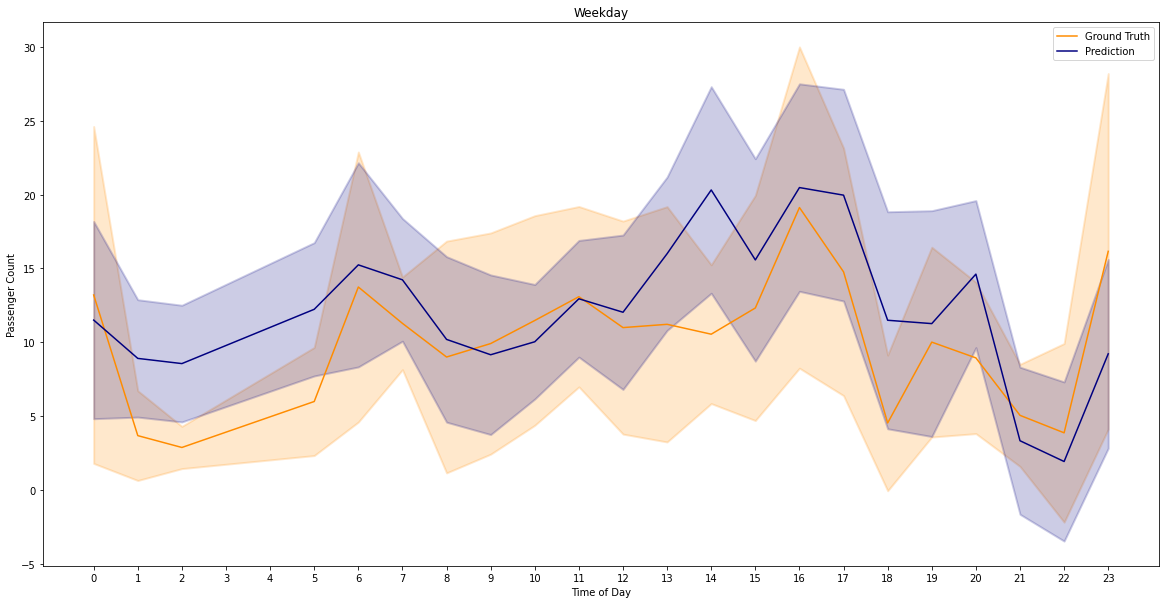

In [118]:
experiment_eval.plot_passenger_count_by_time_of_day('test', segment=None, agg='mean')

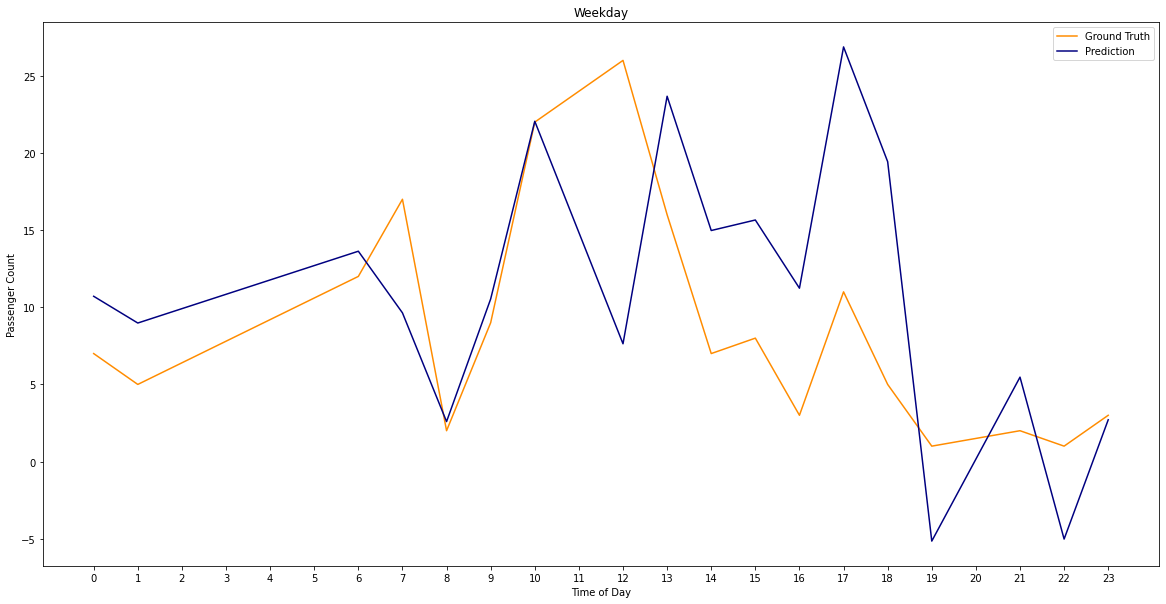

In [119]:
experiment_eval.plot_passenger_count_by_time_of_day('test', segment=46, agg='sum')

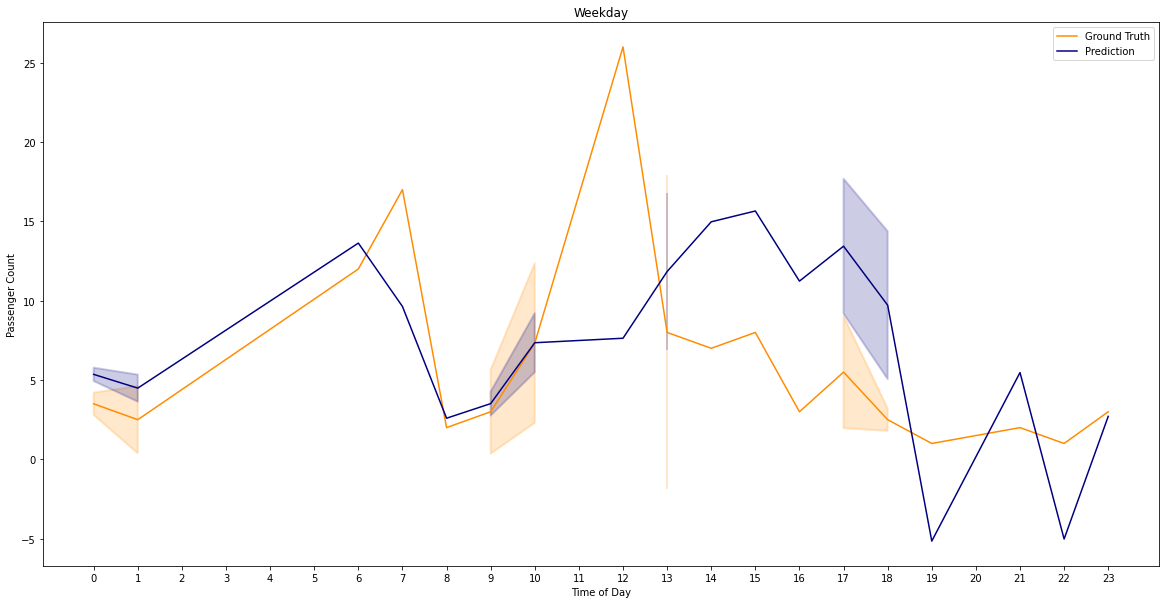

In [120]:
experiment_eval.plot_passenger_count_by_time_of_day('test', segment=46, agg='mean')


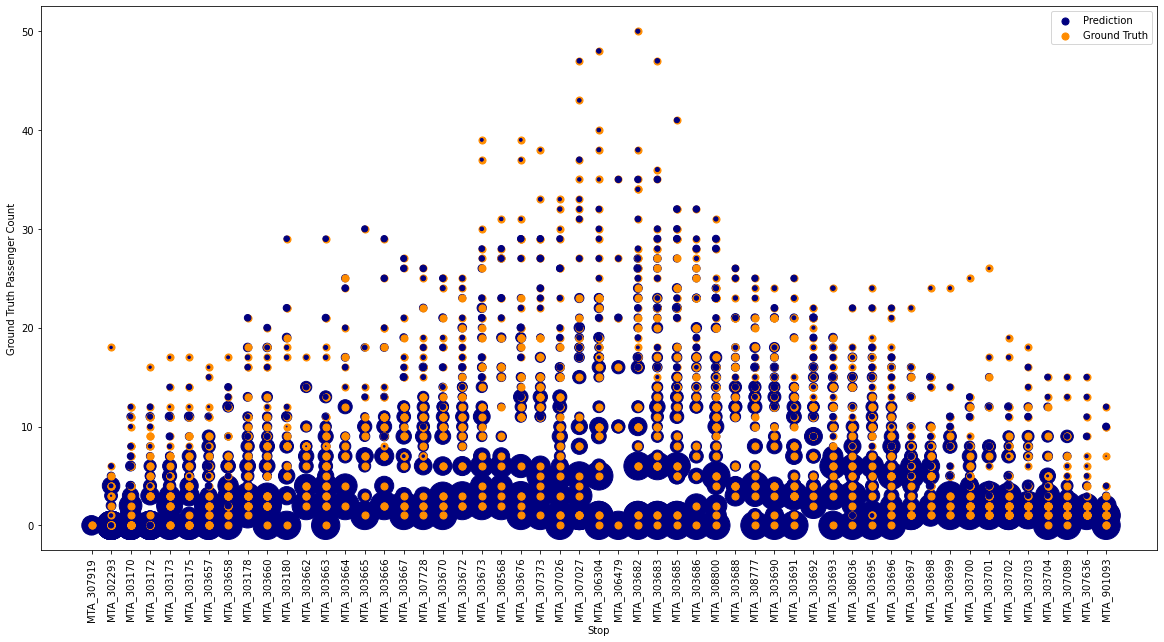

In [121]:
experiment_eval.gt_pred_scatter('test', eps=1, s=50, lower=0, upper=4)